In [1]:
import os
import sys

import pickle

import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.decomposition as skd
import sklearn.feature_selection as skf

import scipy.stats as scs
import statsmodels.stats as sms
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from TCC_pkg import dataanalysis as da
from TCC_pkg import testspecification as tspec
from TCC_pkg import technicalanalysis as ta
from TCC_pkg import autoregressive as ar

# <span style='color:crimson'>1.</span> Input Data

In [4]:
#======== [USER-DEFINED] ========#
series_name = 'aapl'
start_dates = ['2016-07','2017-01','2017-07','2018-01']
#================================#

## <span style='color:MediumBlue'>1.1.</span> Stock series

In [5]:
with open('../Data/{}.pkl'.format(series_name), 'rb') as f:
    df_raw = pickle.load(f)
    
df_raw

Close        High         Low        Open       Volume  \
Date                                                                      
2011-01-03   42.354338   42.443013   41.746018   41.849279  111284600.0   
2011-01-04   42.575382   42.730884   42.171849   42.723173   77270200.0   
2011-01-05   42.923655   42.967350   42.345342   42.351768   63879900.0   
2011-01-06   42.888956   43.084298   42.782290   43.016108   75107200.0   
2011-01-07   43.196105   43.225663   42.653776   42.922370   77982800.0   
2011-01-10   44.010241   44.109839   43.331044   43.544377  112140000.0   
2011-01-11   43.905502   44.332168   43.626626   44.321887  111027000.0   
2011-01-12   44.262770   44.264056   43.951767   44.112409   75647600.0   
2011-01-13   44.424698   44.548071   44.189517   44.357871   74195100.0   
2011-01-14   44.784537   44.784537   44.265341   44.451686   77210000.0   
2011-01-18   43.778273   44.306786   41.895544   42.347913  470249500.0   
2011-01-19   43.545663   44.799959   43.293775   44.767830  283903200.0   
2011-01-20   42.754017   43.476265   42.425021   43.235944  191197300.0   
2011-01-21   41.988074   43.036747   41.976507   42.894097  188600300.0   
2011-01-24   43.367028   43.367028   41.988074   42.007351  143670800.0   
2011-01-25   43.874658   43.879799   42.996908   43.223093  136717000.0   
2011-01-26   44.189517   44.414417   43.887510   44.075140  126718900.0   
2011-01-27   44.107269   44.297829   44.058562   44.180521   71256500.0   
2011-01-28   43.193534   44.260200   42.862997   44.230642  148014300.0   
2011-01-31   43.607349   43.699879   42.962209   43.154980   94311700.0   
2011-02-01   44.341164   44.420843   43.820682   43.861807  106658300.0   
2011-02-02   44.249919   44.369437   44.150963   44.266626   64738800.0   
2011-02-03   44.136827   44.239638   43.508394   44.183092   98449400.0   
2011-02-04   44.530079   44.555782   44.145823   44.162530   80460100.0   
2011-02-07   45.221484   45.397548   44.676585   44.708714  121255400.0   
2011-02-08   45.648151   45.689275   45.256183   45.452809   95260200.0   
2011-02-09   46.028552   46.136504   45.605741   45.646866  120686300.0   
2011-02-10   45.563331   46.265018   44.722850   45.929596  232137500.0   
2011-02-11   45.860199   45.982287   45.434830   45.590654   91893200.0   
2011-02-14   46.159636   46.198190   45.842207   45.852488   77604100.0   
...                ...         ...         ...         ...          ...   
2018-02-13  164.340000  164.750000  161.650000  161.950000   32104756.0   
2018-02-14  167.370000  167.540000  162.880000  163.045000   39669178.0   
2018-02-15  172.990000  173.090000  169.000000  169.790000   50609595.0   
2018-02-16  172.430000  174.820000  171.770000  172.360000   39638793.0   
2018-02-20  171.850000  174.260000  171.420000  172.050000   33531012.0   
2018-02-21  171.070000  174.120000  171.010000  172.830000   35833514.0   
2018-02-22  172.600000  173.950000  171.710000  171.800000   30504116.0   
2018-02-23  175.555000  175.650000  173.540000  173.670000   33329232.0   
2018-02-26  178.970000  179.390000  176.210000  176.350000   36886432.0   
2018-02-27  178.390000  180.480000  178.160000  179.100000   38685165.0   
2018-02-28  178.120000  180.615000  178.050000  179.260000   33604574.0   
2018-03-01  175.000000  179.775000  172.660000  178.540000   48801970.0   
2018-03-02  176.210000  176.300000  172.450000  172.800000   38453950.0   
2018-03-05  176.820000  177.740000  174.520000  175.210000   28401366.0   
2018-03-06  176.670000  178.250000  176.130000  177.910000   23788506.0   
2018-03-07  175.030000  175.850000  174.270000  174.940000   31703462.0   
2018-03-08  176.940000  177.120000  175.070000  175.480000   23163767.0   
2018-03-09  179.980000  180.000000  177.390000  177.960000   31385134.0   
2018-03-12  181.720000  182.390000  180.210000  180.290000   32055405.0   
2018-03-13  179.970000  183.500000  179.240000  182.590000   31168404.0   
2018-03-14  178.440000  180.520000  177.81

In [6]:
da.candleplot(df_raw.drop(columns=['Direction', 'Volume']))

## <span style='color:MediumBlue'>1.2.</span> Network Data

## <span style='color:MediumBlue'>1.3.</span> Sentiment Analysis

## <span style='color:MediumBlue'>1.4.</span> News and Online Data

# <span style='color:crimson'>2.</span> Data Cleaning

## <span style='color:MediumBlue'>2.1.</span> Data Overview

In [7]:
df = df_raw.copy()
print('Shape: {}\n'.format(df.shape))
print('Indices: \n{}\n{}\n'.format(df.index[:5], df.index[-5:]))
print('Columns: \n{}\n'.format(df.columns))
print('Describe(): \n{}\n'.format(df.describe()))

Shape: (1818, 6)

Indices: 
DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
               '2018-03-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

Columns: 
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Direction'], dtype='object')

Describe(): 
             Close         High          Low         Open        Volume  \
count  1818.000000  1818.000000  1818.000000  1818.000000  1.818000e+03   
mean     93.590007    94.390432    92.756979    93.598986  7.538906e+07   
std      36.015008    36.231882    35.780549    36.004098  5.385936e+07   
min      40.523015    40.828878    39.903578    40.697794  1.147592e+07   
25%      65.139696    65.892813    64.477108    65.238411  3.497941e+07   
50%      90.851617    91.566725    89.977604    90.887746  6.085693e+07   
75%     114.83002

## <span style='color:MediumBlue'>2.2.</span> Data Cleaning

In [8]:
# Adjust time-series
df = df_raw.copy()

# 1. Find zeros or negative values
print('Number of zero-values: {}'.format(df[df==0].count().values))

# 2. Find NaNs
print('Number of NaNs: {}'.format(df[df.isna().values].count().values))

# 3. Eliminate entries with NaNs
df = df.dropna(how='any', axis=0)

# 4. Gaps
date_gaps = np.array([(df.index[i]-df.index[i-1]).days for i in range(1,len(df.index))])
print('Average gap: {}'.format(date_gaps.mean()))
print('Max gap: {}'.format(date_gaps.max()))
print('No. of gaps greater than 5: {}'.format(len(date_gaps[date_gaps>5])))
print('15 greatest gaps: {}'.format(np.sort(date_gaps)[-15:]))
print('Dates of greatest gap: \n{}\n'.format(df.iloc[date_gaps.argmax()-1:date_gaps.argmax()+3]))

df_adj = df

Number of zero-values: [0 0 0 0 0 0]
Number of NaNs: [1 1 1 1 1 0]
Average gap: 1.453193832599119
Max gap: 5
No. of gaps greater than 5: 0
15 greatest gaps: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 5]
Dates of greatest gap: 
                Close       High        Low       Open       Volume  Direction
Date                                                                          
2012-10-25  78.668550  80.276928  78.153848  80.018803  164081400.0       -1.0
2012-10-26  77.953801  79.244427  76.275988  78.654611  254608200.0       -1.0
2012-10-31  76.833538  77.690514  75.850081  76.776751  127500800.0       -1.0
2012-11-01  76.990982  77.824739  76.685116  77.207820   90324500.0        1.0



## <span style='color:MediumBlue'>2.3.</span> Outliers

In [9]:
df = df_adj.copy()
ts = df_adj['Close']
n_std = 3

df = pd.concat([df, da.roll_stats(ts=ts, window=30)], axis=1).dropna(how='any',axis=0)
df['Upper'] = df['Rolling Mean'] + n_std*df['Rolling Variance'].apply(np.sqrt)
df['Lower'] = df['Rolling Mean'] - n_std*df['Rolling Variance'].apply(np.sqrt)

da.plotscatter(df.drop(columns='Direction'))

# Outlier criterion
df_out = df[(df['Close'] > df['Upper']) | (df['Close'] < df['Lower'])]
df['Out'] = df.loc[df_out.index, 'Close']

df = df.replace(np.nan, 0) # for plotting
da.plotscatter(df.drop(columns='Direction'))

df = df.drop(df_out.index)
df_adj_noout = df[['Close']]

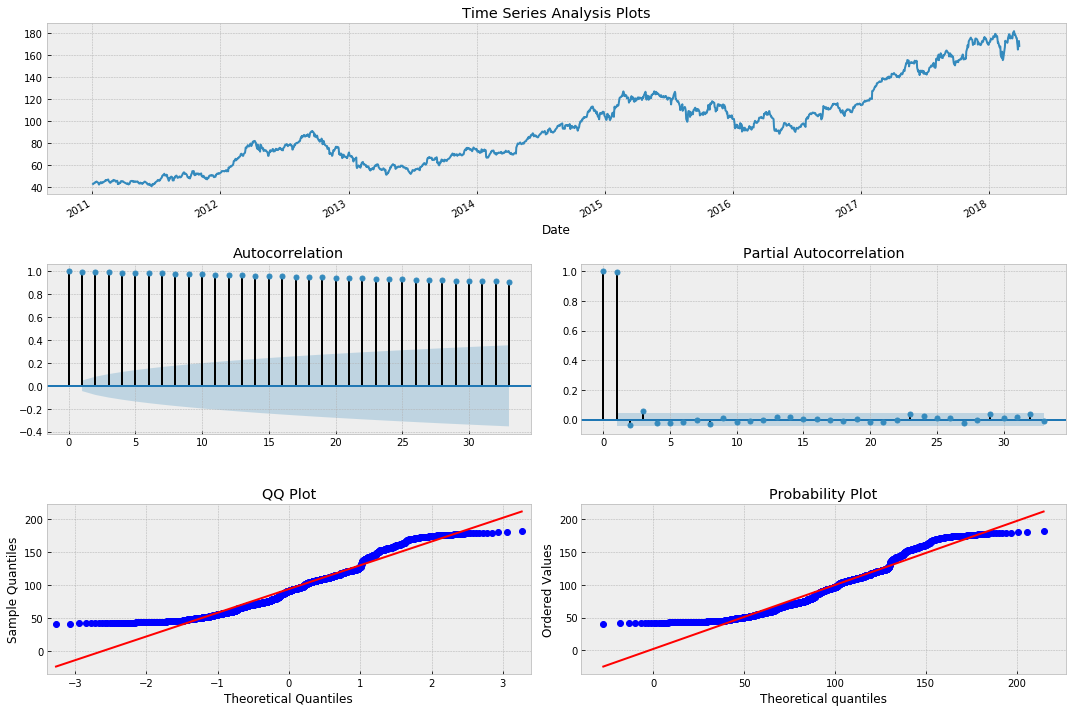

In [10]:
da.tsplot(df_adj['Close'], lags=33)

# <span style='color:crimson'>*.</span> Input-Output Definition

In [11]:
df = df_adj.copy()

input_cols = ['Close','High','Low','Open','Volume']
target_col = ['Direction']

# The last index does not correspond to a sample because there is no information about the next day's direction
X_raw, y_raw = df.loc[df.index[:-1],input_cols], df[target_col].shift(-1).loc[df.index[:-1]]

assert all(y_raw.values==df[target_col].values[1:])
assert X_raw.shape[0]==y_raw.shape[0]

# <span style='color:crimson'>4.</span> Data Transformation

**Good references: [1,6,33,35,39]**

In [12]:
X = X_raw.copy()
X_diff = da.difference_ts(df=X)
X.describe()

Close         High          Low         Open        Volume
count  1816.000000  1816.000000  1816.000000  1816.000000  1.816000e+03
mean     93.577059    94.374566    92.744230    93.583385  7.538936e+07
std      35.972003    36.181699    35.737853    35.954339  5.387565e+07
min      40.523015    40.828878    39.903578    40.697794  1.147592e+07
25%      65.170090    65.959239    64.501700    65.344658  3.493944e+07
50%      90.851617    91.566725    89.977604    90.887746  6.085693e+07
75%     114.782767   115.398129   113.848545   114.735599  9.965060e+07
max     181.720000   183.500000   180.210000   182.590000  4.702495e+08

# <span style='color:crimson'>3.</span> Data Generation

**Good references: [1,6,33,35,39]**

## <span style='color:MediumBlue'>3.1.</span> Lagged Values

In [15]:
def lag_features(X, n_lags):
    X_lag = pd.DataFrame(data=[], index=X.index, columns=[]) # empty dataframe
    for lag in range(0,n_lags):
        col_names = {col:col+'(t-%d)'%lag for col in X.columns}
        X_tmp = X.shift(periods=lag)
        X_tmp = X_tmp.rename(columns=col_names)
        X_lag = pd.concat([X_lag, X_tmp], axis=1)
    return X_lag

In [16]:
X = X_diff.copy()

# Test #1: LAGGED VALS (number of lags defined in the beginning of the script)
n_lags=2
X_lag = lag_features(X, n_lags)
X_lag.describe()

Close(t-0)    High(t-0)     Low(t-0)    Open(t-0)   Volume(t-0)  \
count  1815.000000  1815.000000  1815.000000  1815.000000  1.815000e+03   
mean      0.071733     0.071829     0.068467     0.069062 -2.258820e+04   
std       1.458584     1.273165     1.474766     1.605976  3.302662e+07   
min      -8.235044    -9.063226   -13.126649   -14.968902 -1.863463e+08   
25%      -0.601265    -0.539018    -0.535491    -0.660803 -1.170831e+07   
50%       0.050120     0.047500     0.137557     0.094375 -1.080800e+06   
75%       0.801284     0.652149     0.787648     0.854121  1.154325e+07   
max       7.830000     9.491489    11.063134    15.623070  3.930395e+08   

        Close(t-1)    High(t-1)     Low(t-1)    Open(t-1)   Volume(t-1)  
count  1814.000000  1814.000000  1814.000000  1814.000000  1.814000e+03  
mean      0.067456     0.070115     0.067678     0.069276 -2.040863e+04  
std       1.447558     1.271421     1.474790     1.606393  3.303559e+07  
min      -8.235044    -9.063226   -13.126649   -14.968902 -1.863463e+08  
25%      -0.601827    -0.539290    -0.535898    -0.660803 -1.171910e+07  
50%       0.050060     0.046572     0.136773     0.094874 -1.027536e+06  
75%       0.800481     0.650364     0.786400     0.854341  1.154827e+07  
max       7.308599     9.491489    11.063134    15.623070  3.930395e+08

## <span style='color:MediumBlue'>3.1.</span> Technical Indicators

In [17]:
X = X_raw.copy()

# Which indicators we want (and their parameters)
ind_param_list=[('SMA',{'window':20,'output_colname':'SMA20'}),('EMA',{'window':15,'output_colname':'EMA15'}),
                ('BB',{}), ('MACD',{}), ('STOCH',{}), 
                ('RSI',{}), ('CHAIKIN',{}),('AROON',{}), ('OBV',{}), ('PVT',{}), 
                ('DISP',{'window':10, 'ma_func':ta.SMA, 'output_colname':'DISP_SMA10'}), 
                ('DISP',{'window':5, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA5'}), 
                ('ROC',{'gap':1, 'output_colname':'ROC1'}), ('WILLIAMS',{}), ('CCI',{})]

X_ta = ta.get_indicators(X, indicator_list=ind_param_list)

X_ta.describe()

SMA20        EMA15    BB_Bottom    BB_Middle       BB_Top  \
count  1797.000000  1802.000000  1797.000000  1797.000000  1797.000000   
mean     93.413456    93.460465    88.685808    93.413456    98.141104   
std      35.388200    35.512607    34.266677    35.388200    36.650780   
min      42.358194    42.150185    39.800053    42.358194    43.982955   
25%      64.942027    64.611542    60.866836    64.942027    69.197470   
50%      92.010464    92.530794    87.355994    92.010464    95.321844   
75%     113.567957   113.622480   108.840384   113.567957   119.184116   
max     176.944750   177.065486   172.010361   176.944750   185.482010   

         MACD_Hist    MACD_Line  MACD_SigLine           %D           %K  \
count  1783.000000  1791.000000   1783.000000  1801.000000  1803.000000   
mean      0.000207     0.511244      0.509740    58.731905    58.716283   
std       0.502304     1.612661      1.515394    28.217219    30.946900   
min      -1.927853    -4.316973     -3.763474     3.523086     0.000000   
25%      -0.288766    -0.385039     -0.381892    32.849289    30.687188   
50%       0.000004     0.445456      0.475188    64.471912    64.900662   
75%       0.308037     1.556387      1.494085    84.938742    87.500005   
max       1.882257     4.804685      4.236285    99.051674   100.000000   

          ...        Aroon_Down    Aroon_Osc     Aroon_Up           OBV  \
count     ...       1793.000000  1793.000000  1793.000000  1.816000e+03   
mean      ...         42.031511    14.842443    56.873954 -6.940466e+08   
std       ...         33.401746    60.537399    35.229345  7.838046e+08   
min       ...          4.166667   -95.833333     4.166667 -2.961821e+09   
25%       ...          8.333333   -41.666667    20.833333 -1.120443e+09   
50%       ...         33.333333    33.333333    58.333333 -6.342164e+08   
75%       ...         70.833333    66.666667    91.666667 -2.734391e+08   
max       ...        100.000000    95.833333   100.000000  2.453803e+09   

                PVT   DISP_SMA10    DISP_EMA5         ROC1  Williams_%R  \
count  1.816000e+03  1807.000000  1812.000000  1815.000000  1803.000000   
mean  -7.250373e+06     1.003542     1.001482     1.000897   -41.283717   
std    2.124942e+07     0.026761     0.014226     0.015833    30.946900   
min   -6.343599e+07     0.892995     0.922638     0.876451  -100.000000   
25%   -2.008619e+07     0.986983     0.993375     0.993076   -69.312812   
50%   -5.986967e+06     1.004505     1.002309     1.000494   -35.099338   
75%    1.594390e+06     1.021202     1.010372     1.009476   -12.499995   
max    5.324553e+07     1.099147     1.051030     1.088741    -0.000000   

               CCI  
count  1797.000000  
mean     22.993996  
std     110.140087  
min    -383.087622  
25%     -62.436161  
50%      36.784301  
75%     106.584490  
max     354.372219  

[8 rows x 22 columns]

In [18]:
X = X_ta.copy()

X_ta_lag = lag_features(X, 3)
X_ta_lag.shape

(1816, 66)

### <span style='color:Goldenrod'>3.1.1.</span> Kim [2003]

In [19]:
X = X_raw.copy()

ind_param_list = [('STOCH',{}), 
                  ('ROC',{'gap':1, 'output_colname':'ROC1'}),
                  ('WILLIAMS',{}),
                  ('CHAIKIN',{}),
                  ('DISP',{'window':5, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA5'}), 
                  ('DISP',{'window':10, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA10'}), 
                  ('CCI',{}),
                  ('RSI',{})
                 ]

X_ta_ref33 = ta.get_indicators(X, indicator_list=ind_param_list)
X_ta_ref33.describe()

%D           %K         ROC1  Williams_%R       CHAIKIN  \
count  1801.000000  1803.000000  1815.000000  1803.000000  1.807000e+03   
mean     58.731905    58.716283     1.000897   -41.283717  3.880727e+06   
std      28.217219    30.946900     0.015833    30.946900  5.960610e+07   
min       3.523086     0.000000     0.876451  -100.000000 -2.224013e+08   
25%      32.849289    30.687188     0.993076   -69.312812 -2.140824e+07   
50%      64.471912    64.900662     1.000494   -35.099338  4.428295e+06   
75%      84.938742    87.500005     1.009476   -12.499995  3.113194e+07   
max      99.051674   100.000000     1.088741    -0.000000  3.089640e+08   

         DISP_EMA5   DISP_EMA10          CCI          RSI  
count  1812.000000  1807.000000  1797.000000  1802.000000  
mean      1.001482     1.003371    22.993996    54.971855  
std       0.014226     0.022416   110.140087    13.356419  
min       0.922638     0.901627  -383.087622    21.458262  
25%       0.993375     0.990127   -62.436161    45.427941  
50%       1.002309     1.004614    36.784301    54.236756  
75%       1.010372     1.018074   106.584490    64.510786  
max       1.051030     1.079109   354.372219    90.665042

### <span style='color:Goldenrod'>3.1.1.</span> Mine

In [20]:
X = X_raw.copy()

ind_param_list = [('DISP',{'window':1, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA1'}), 
                  ('DISP',{'window':3, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA3'}), 
                  ('DISP',{'window':5, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA5'}), 
                  ('DISP',{'window':10, 'ma_func':ta.EMA, 'output_colname':'DISP_EMA10'}), 
                  ('ROC',{'gap':2, 'output_colname':'ROC2'}),
                  ('ROC',{'gap':7, 'output_colname':'ROC7'}),
                  ('STOCH',{}), 
                  ('WILLIAMS',{}),
                  ('CHAIKIN',{}),
                  ('BB',{}), 
                  ('MACD',{}), 
                  ('RSI',{}),
                  ('AROON',{}),
                  ('CCI',{}),
                  ('PVT',{})
                 ]

X_ta_mine = ta.get_indicators(X, indicator_list=ind_param_list)
X_ta_mine = lag_features(X_ta_mine, 3)
X_ta_mine.shape

(1816, 66)

## <span style='color:MediumBlue'>3.*.</span> Final Features

In [21]:
#======== [USER-DEFINED] ========#
# DataFrame of raw features: join the desired ones
X_rawfeat = pd.concat([X_ta_mine], axis=1)
#================================#

# X_rawfeat.describe()
X_rawfeat.columns

Index(['DISP_EMA1(t-0)', 'DISP_EMA3(t-0)', 'DISP_EMA5(t-0)', 'DISP_EMA10(t-0)',
       'ROC2(t-0)', 'ROC7(t-0)', '%D(t-0)', '%K(t-0)', 'Williams_%R(t-0)',
       'CHAIKIN(t-0)', 'BB_Bottom(t-0)', 'BB_Middle(t-0)', 'BB_Top(t-0)',
       'MACD_Hist(t-0)', 'MACD_Line(t-0)', 'MACD_SigLine(t-0)', 'RSI(t-0)',
       'Aroon_Down(t-0)', 'Aroon_Osc(t-0)', 'Aroon_Up(t-0)', 'CCI(t-0)',
       'PVT(t-0)', 'DISP_EMA1(t-1)', 'DISP_EMA3(t-1)', 'DISP_EMA5(t-1)',
       'DISP_EMA10(t-1)', 'ROC2(t-1)', 'ROC7(t-1)', '%D(t-1)', '%K(t-1)',
       'Williams_%R(t-1)', 'CHAIKIN(t-1)', 'BB_Bottom(t-1)', 'BB_Middle(t-1)',
       'BB_Top(t-1)', 'MACD_Hist(t-1)', 'MACD_Line(t-1)', 'MACD_SigLine(t-1)',
       'RSI(t-1)', 'Aroon_Down(t-1)', 'Aroon_Osc(t-1)', 'Aroon_Up(t-1)',
       'CCI(t-1)', 'PVT(t-1)', 'DISP_EMA1(t-2)', 'DISP_EMA3(t-2)',
       'DISP_EMA5(t-2)', 'DISP_EMA10(t-2)', 'ROC2(t-2)', 'ROC7(t-2)',
       '%D(t-2)', '%K(t-2)', 'Williams_%R(t-2)', 'CHAIKIN(t-2)',
       'BB_Bottom(t-2)', 'BB_Middle(t-2)',

In [22]:
# Last step: define margin (dependencies) and remove NaNs
X = X_rawfeat.copy()
y = y_raw.copy()

# Margin: maximum number of NaNs in a column
margin = X.isna().sum().max()

X_feat = X.dropna()
y_feat = y.loc[X_feat.index]
y_feat['Direction'] = skp.label_binarize(y_feat, classes=[-1, 1])

assert X_feat.isna().sum().sum() == 0
assert y_feat.shape[0]==X_feat.shape[0]

print(margin)
X_feat.shape

35


(1781, 66)

# <span style='color:crimson'>4.</span> Data Transformation

## <span style='color:MediumBlue'>4.1.</span> Scaling/Normalization

Fonte: http://scikit-learn.org/stable/modules/preprocessing.html

In [23]:
# Isso tem que virar uma funcao
def scale_train_test_sets(X_train, X_test=None):
    # Define scaler
    scaler = skp.MinMaxScaler(feature_range=(-1,1))

    # COLUMN-WISE transformation, i.e., transform each feature independently
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns) 

    if X_test is not None:
        # Apply same scaling parameters to test set (during test we do not know future values to scale)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    else:
        X_test_scaled = None

    return X_train_scaled, X_test_scaled

# <span style='color:crimson'>5.</span> Feature Selection

## <span style='color:MediumBlue'>5.1.</span> Correlation

In [24]:
corr_dict = {col: np.correlate(X_feat[col].values.ravel(), 
df_raw.loc[X_feat.index,'Close'].values.ravel()) for col in X_feat.columns}
corr_dict
corr_dict = {col: np.correlate(X_feat[col].values.ravel(), y_feat.values.ravel()) for col in X_feat.columns}
corr_dict

{'%D(t-0)': array([54508.49109466]),
 '%D(t-1)': array([54403.76486935]),
 '%D(t-2)': array([54187.88762899]),
 '%K(t-0)': array([54613.21731997]),
 '%K(t-1)': array([54619.6421097]),
 '%K(t-2)': array([54203.77151491]),
 'Aroon_Down(t-0)': array([38145.83333333]),
 'Aroon_Down(t-1)': array([38370.83333333]),
 'Aroon_Down(t-2)': array([37975.]),
 'Aroon_Osc(t-0)': array([15116.66666667]),
 'Aroon_Osc(t-1)': array([14095.83333333]),
 'Aroon_Osc(t-2)': array([14458.33333333]),
 'Aroon_Up(t-0)': array([53262.5]),
 'Aroon_Up(t-1)': array([52466.66666667]),
 'Aroon_Up(t-2)': array([52433.33333333]),
 'BB_Bottom(t-0)': array([81191.47879419]),
 'BB_Bottom(t-1)': array([81116.12086544]),
 'BB_Bottom(t-2)': array([81040.29538975]),
 'BB_Middle(t-0)': array([85593.31324954]),
 'BB_Middle(t-1)': array([85516.51403131]),
 'BB_Middle(t-2)': array([85440.01376323]),
 'BB_Top(t-0)': array([89995.14770489]),
 'BB_Top(t-1)': array([89916.90719717]),
 'BB_Top(t-2)': array([89839.73213671]),
 'CCI(t-0)'

In [25]:
{col: scs.pearsonr(x=X_feat[col].values.ravel(), 
                   y=df_raw.loc[X_feat.index,'Close'].values.ravel()) for col in X_feat.columns}
{col: scs.pearsonr(x=X_feat[col].values.ravel(), y=y_feat.values.ravel()) for col in X_feat.columns}


/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning:

invalid value encountered in double_scalars



{'%D(t-0)': (0.028283941698390554, 0.2328550399870949),
 '%D(t-1)': (0.024056122306032834, 0.3102736363106624),
 '%D(t-2)': (0.014856916503200266, 0.5309316812351665),
 '%K(t-0)': (0.02965516434043578, 0.21097074509112884),
 '%K(t-1)': (0.030328636825718847, 0.2007838155718706),
 '%K(t-2)': (0.015180621978013866, 0.5220177987444455),
 'Aroon_Down(t-0)': (-0.02057230680728316, 0.3855735750251824),
 'Aroon_Down(t-1)': (-0.011501974266039551, 0.6276193360050029),
 'Aroon_Down(t-2)': (-0.02330237008480734, 0.32568264128696667),
 'Aroon_Osc(t-0)': (0.03416238988024041, 0.1495490752924659),
 'Aroon_Osc(t-1)': (0.014173601007097514, 0.5499981455957501),
 'Aroon_Osc(t-2)': (0.01986230400539145, 0.4021874075131334),
 'Aroon_Up(t-0)': (0.03919639117287749, 0.09820146974417863),
 'Aroon_Up(t-1)': (0.013448525315293353, 0.5705915937574118),
 'Aroon_Up(t-2)': (0.012039296006190033, 0.6116337278545363),
 'BB_Bottom(t-0)': (-0.022816732324954105, 0.33586950462827125),
 'BB_Bottom(t-1)': (-0.023192744

In [27]:
print(smt.stattools.grangercausalitytests(x=np.concatenate(
    (y_feat.values.ravel().reshape(-1,1), X_feat['RSI(t-0)'].values.reshape(-1,1)), axis=1), maxlag=5))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3697  , p=0.2420  , df_denom=1777, df_num=1
ssr based chi2 test:   chi2=1.3720  , p=0.2415  , df=1
likelihood ratio test: chi2=1.3715  , p=0.2416  , df=1
parameter F test:         F=1.3697  , p=0.2420  , df_denom=1777, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9836  , p=0.0509  , df_denom=1774, df_num=2
ssr based chi2 test:   chi2=5.9840  , p=0.0502  , df=2
likelihood ratio test: chi2=5.9740  , p=0.0504  , df=2
parameter F test:         F=2.9836  , p=0.0509  , df_denom=1774, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3407  , p=0.0716  , df_denom=1771, df_num=3
ssr based chi2 test:   chi2=7.0498  , p=0.0703  , df=3
likelihood ratio test: chi2=7.0358  , p=0.0708  , df=3
parameter F test:         F=2.3407  , p=0.0716  , df_denom=1771, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8466  , p=0.

## <span style='color:MediumBlue'>5.2.</span> Mutual Information

In [28]:
X_feat.columns[skf.mutual_info_classif(X=X_feat, y=y_feat)>0.001]

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Index(['DISP_EMA1(t-0)', 'DISP_EMA5(t-0)', 'ROC7(t-0)', 'BB_Bottom(t-0)',
       'BB_Top(t-0)', 'RSI(t-0)', 'Aroon_Down(t-0)', 'CCI(t-0)',
       'DISP_EMA3(t-1)', 'ROC7(t-1)', 'CHAIKIN(t-1)', 'BB_Bottom(t-1)',
       'BB_Top(t-1)', 'MACD_Hist(t-1)', 'MACD_Line(t-1)', 'MACD_SigLine(t-1)',
       'DISP_EMA10(t-2)', 'ROC2(t-2)', '%D(t-2)', 'BB_Bottom(t-2)',
       'BB_Middle(t-2)', 'Aroon_Osc(t-2)', 'PVT(t-2)'],
      dtype='object')

# <span style='color:crimson'>6.</span> Feature Extraction

## <span style='color:MediumBlue'>6.1.</span> PCA

In [29]:
def apply_pca(X_train, X_test):
    pca = skd.PCA()
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #The amount of variance that each PC explains
    pve= pca.explained_variance_ratio_

    #Cumulative Variance explains
    cum_pve=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    cutoff = cum_pve<99
    
    X_train_pca = X_train_pca[:,cutoff]
    X_test_pca  = X_test_pca[:,cutoff]
    
    return X_train_pca, X_test_pca

## <span style='color:MediumBlue'>6.2.</span> AE

# <span style='color:crimson'>7.</span> Test Design

In [30]:
y = y_feat

np.random.seed(12)
test_spec = tspec.TestSpec(indices=y.index, 
                            start_dates=start_dates, 
                            window_size=400,
                            margin=margin
                           )


# <span style='color:crimson'>*.</span> Train-test split

# <span style='color:crimson'>8.</span> Comparison Metrics

# <span style='color:crimson'>9.</span> Models

## <span style='color:MediumBlue'>9.1.</span> Logistic Regression

Fontes:
- http://scikit-learn.org/stable/modules/linear_model.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**HYPERPARAMETERS**:
- `penalty` : str, `‘l1’` or `‘l2’`, default: ‘l2’
- `C` : float, default: `1.0` - 
    - Inverse of regularization strength; must be a positive float; smaller values = stronger regularization.
        - Small C: probability curves will look more like straight lines (long transition between 0-1)
        - Large C: probability curves will look more like step function (fast transition between 0-1)

In [31]:
def comparison_metric(perf_matrix, weights):
    weights = np.array(weights).reshape(-1,1)
    sorted_inds = np.argsort(perf_matrix, axis=0)
    value = np.repeat(np.arange(perf_matrix.shape[0]).reshape(-1,1), perf_matrix.shape[1], axis=1)
    rank = np.empty_like(sorted_inds)
    for i in range(sorted_inds.shape[0]):
        for j in range(sorted_inds.shape[1]):
            rank[sorted_inds[i,j],j] = value[i,j]
    rank_perf = np.matmul(rank[:,:weights.shape[0]], weights)
    return np.argmax(rank_perf)

In [32]:
# Consider 5 options 

metrics_available = {1:'1. AUC-ROC',          # theory:0-1; practice:~0.5
                     2:'2. Mathews_CorrCoef',  
                     3:'3. F-beta_0.5',       # theory:0-1; practice:~0.5
                     4:'4. F1',
                     5:'5. Cohen_Kappa',
                     6:'6. Precision', 
                     7:'7. Specificity', 
                     8:'8. Accuracy', 
                     9:'9. Recall'
                    }
n_metrics = 13 # CONSTANT

#================================ [USER-DEFINED] ================================#
# Hyperparameters
model_func = LogisticRegression
regularizers = ['l1','l2']
reg_coeff = np.power(10,np.linspace(-3,0,20))
kwparams_list = list({'penalty':reg, 'C':C} for C in reg_coeff for reg in regularizers) 
metric = metrics_available[2]
weights = [1, 0.9, 0.8, 0.8, 0.7]
# weights = [1, 0, 0, 0, 0]
# weights = [0, 1, 0, 0, 0]
# weights = [0, 0, 1, 0, 0]
# weights = [0, 0, 0, 1, 0]
# weights = [0, 0, 0, 0, 1]
#================================================================================#
import warnings
warnings.filterwarnings(action='ignore')

# Observation:
# X = (samples/examples x features/inputs) = (m x n)
X = X_feat.copy()
y = y_feat.copy()

ml_res = {}
y_test_joined = np.array([])
y_prob_joined = np.array([])
y_pred_joined = np.array([])
for inst in range(len(test_spec.instance)):
    # Define test instance
    instance = test_spec.instance[inst]

    # Define test set
    X_test = instance.test_set

    # Cross-validation
    best_perf = 0
    perf_matrix = np.zeros((len(kwparams_list),n_metrics))
    iparam = 0                       
    for kwparams in kwparams_list:
        for fold in range(instance.CrossValidation.n_folds):
            # Get cross-validation sets
            train_ind = instance.expanding_window_cv.train_sets[fold]
            val_ind = instance.expanding_window_cv.val_sets[fold]
            X_train, X_val = X.loc[train_ind], X.loc[val_ind]
            y_train, y_val = y.loc[train_ind], y.loc[val_ind]

            assert all(X_train.index == y_train.index) and all(X_val.index == y_val.index)

            # Scale values
            X_train, X_val = scale_train_test_sets(X_train, X_val)
            X_train, X_val = apply_pca(X_train, X_val)
            y_train, y_val = y_train.values.ravel(), y_val.values.ravel() # transforms into array (m,)

            # Fit logistic regression model
            log_reg = LogisticRegression(**kwparams, class_weight='balanced')
            log_reg.fit(X_train, y_train)

            y_pred = log_reg.predict(X_val)
            y_prob = log_reg.predict_proba(X_val) # use for AUC-ROC

            fold_perf = da.classification_metrics(y_true=y_val, y_pred=y_pred, y_prob=y_prob[:,1])
            perf_matrix[iparam,:] += list(fold_perf.values())
        iparam += 1

    i_best_params = comparison_metric(perf_matrix, weights)
    best_params = kwparams_list[i_best_params]
    print(best_params)

    # Train on entire train set
    X_train, X_test = X.loc[instance.train_set], X.loc[instance.test_set]
    y_train, y_test = y.loc[instance.train_set], y.loc[instance.test_set]

    # Scale values
    X_train, X_test = scale_train_test_sets(X_train, X_test)
    X_train, X_test = apply_pca(X_train, X_test)
    y_train, y_test = y_train.values.ravel(), y_test.values.ravel() # transforms into array (m,)

    # Apply best hyperparameters
    log_reg = LogisticRegression(**best_params, class_weight='balanced')
    log_reg.fit(X_train, y_train)

    # Predict classes and probabilities
    y_pred = log_reg.predict(X_test)
    y_prob = log_reg.predict_proba(X_test) # use for AUC-ROC

    # Join to get complete statistics later
    y_test_joined = np.concatenate([y_test_joined,y_test], axis=0)
    y_prob_joined = np.concatenate([y_prob_joined,y_prob[:,1]], axis=0)
    y_pred_joined = np.concatenate([y_pred_joined,y_pred], axis=0)
    
    # Test performance
    ml_res['LR_Test-%d'%inst] = da.classification_metrics(y_true=y_test, y_pred=y_pred, y_prob=y_prob[:,1])

ml_res['LR_Test-all'] = da.classification_metrics(y_true=y_test_joined, y_pred=y_pred_joined, 
                                                  y_prob=y_prob_joined)    
test_perf = pd.DataFrame(data=ml_res)                                     

{'penalty': 'l2', 'C': 1.0}
{'penalty': 'l2', 'C': 0.3359818286283781}
{'penalty': 'l2', 'C': 0.00206913808111479}
{'penalty': 'l2', 'C': 0.001}


In [33]:
test_perf

LR_Test-0  LR_Test-1  LR_Test-2  LR_Test-3  LR_Test-all
1. AUC-ROC            0.552343   0.574819   0.494862   0.433894     0.526774
2. Mathews_CorrCoef   0.120120   0.050227   0.008420  -0.057333     0.045923
3. F-beta_0.5         0.585443   0.495283   0.403727   0.348837     0.496774
4. F1                 0.569231   0.403846   0.282609   0.292683     0.419619
5. Cohen_Kappa        0.119584   0.043682   0.006072  -0.052566     0.041515
6. Precision          0.596774   0.583333   0.565217   0.400000     0.566176
7. Specificity        0.576271   0.736842   0.818182   0.718750     0.709360
8. Accuracy           0.559055   0.504000   0.467742   0.500000     0.509217
9. Recall             0.544118   0.308824   0.188406   0.230769     0.333333
FN                   31.000000  47.000000  56.000000  20.000000   154.000000
FP                   25.000000  15.000000  10.000000   9.000000    59.000000
TN                   34.000000  42.000000  45.000000  23.000000   144.000000
TP                   37.000000  21.000000  13.000000   6.000000    77.000000

# <span style='color:crimson'>10.</span> Tests

# <span style='color:crimson'>11.</span> Results

# <span style='color:crimson'>12.</span> Comparisons